# Variable Selection While Predicting Apartment Price in Victoria Using Regression


### Background : 
The Dataset provides living area and conservation status.
There are 218 observations and 16 variables.

### Objective :
Create a python script for the Use Case below, please upload the script after you finish.
The Problem is to determine the best model and give the reason.

Tony who has profession as a broker wants to predict apartment price in Victoria based on living
area environment and apartment conservation status. Determine the best model to predict and
redefine new conservation variable in 3 level, A = 1A, B = 2A, C = 2B and 3A.

### Instructions :
Download the dataset as a CSV file and place it in your current working directory with the filename
"victoria.csv".
1. Import Dataset: Load the dataset.
2. Exploratory Data Analysis: Create summary of the dataset, with python function. (mean,median, modus, max, min, range)
3. Data Visualization: Create any kind suitable plot of dataset, it will provide a lot of insightinto the problem.
4. Variable Selection: Choose the variable and its reason.
5. Modelling: Create models using Regression
6. Accuracy or Error: Calculate the Error using the helper function from the library, from dataset only



# 1. Import Dataset : Load Dataset

### Import Library

In [1]:
import warnings
warnings.filterwarnings("ignore")
#from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import LinearSVR, SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

### Load Dataset

In [2]:
data=pd.read_csv('victoria1.csv', sep=';')
data=data.drop('row.labels',axis=1)
data.head()


,totalprice,area,zone,category,age,floor,rooms,out,conservation,toilets,garage,elevator,streetcategory,heating,tras
0,228000.0,7.531000e+09,Z45,4B,33,3,5,E100,2B,1,0,1,S3,3A,0
1,409000.0,1.006500e+09,Z31,3B,5,7,5,E50,1A,2,1,1,S5,4A,1
2,200000.0,8.887000e+09,Z52,3A,14,8,5,E50,1A,2,0,1,S2,3A,0
3,180000.0,6.261000e+09,Z62,4A,41,3,4,E50,2A,1,0,0,S3,1A,0
4,443600.0,1.461500e+09,Z31,3A,22,6,7,E100,1A,2,0,1,S4,4A,1


# 2. Exploratory Data Analysis

### Create summary of the dataset (mean, median, modus, max, min, range)

In [3]:
data.describe()

,totalprice,area,age,floor,rooms,toilets,garage,elevator,tras
count,218.000000,2.180000e+02,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000
mean,280741.523853,5.718657e+09,19.899083,4.440367,4.853211,1.467890,0.243119,0.798165,0.807339
std,69298.459358,3.455007e+09,14.595590,2.126988,0.634285,0.500116,0.450881,0.402293,0.406787
min,155000.000000,5.300000e+01,1.000000,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000
25%,228500.000000,1.187250e+09,11.000000,3.000000,5.000000,1.000000,0.000000,1.000000,1.000000
50%,269750.000000,7.118500e+09,16.000000,4.000000,5.000000,1.000000,0.000000,1.000000,1.000000
75%,328625.000000,8.542750e+09,24.000000,5.000000,5.000000,2.000000,0.000000,1.000000,1.000000
max,560000.000000,9.992000e+09,118.000000,12.000000,7.000000,2.000000,2.000000,1.000000,2.000000


# Data Visualization
## Create any kind suitable plot of dataset, it will provide a lot of insight into the problem

## Price Compared By Zone

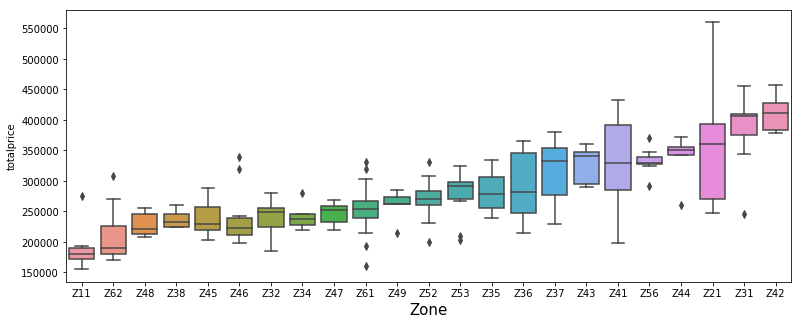

In [6]:
data2=data[['totalprice','zone']]
data2_group=data2.groupby('zone').mean().sort_values('totalprice')
data2_group.index

f=plt.figure(figsize=(13,5))
# Distribution off Age
f.add_subplot(1,1,1)
c=sns.boxplot(y=data['totalprice'],x=data['zone'], order=data2_group.index)
c.set_xlabel("Zone", fontsize=15)
plt.show()

Dari Boxplot di atas, terlihat bahwa Rumah/Apartemen yang memilki harga yng lebih rendah berada di zona 11, 62, 48, dan 38, sedangkan rumah yang berada di zona 21, 31, dan 42 memiliki harga yang sangat tinggi

# Modelling With All Data

In [7]:
y=(data['totalprice'])
X=data.drop(['totalprice','zone'],1)

X=pd.get_dummies(X)
X.head()

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=1)

In [8]:
## collect all model in one list
all_model = [LinearRegression,
             Ridge,
             Lasso]

desc_model = ['LinearRegression',
             'Ridge Regression',
             'Lasso Regression']

all_model

[sklearn.linear_model.base.LinearRegression,
 sklearn.linear_model.ridge.Ridge,
 sklearn.linear_model.coordinate_descent.Lasso]

In [9]:
R2_train = []
R2_test = []
RMSE =[]
CV =[]

for i in all_model:
    model = i()
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    R2_train.append(model.score(X_train,y_train))
    R2_test.append(model.score(X_test,y_test))
    rmse=np.sqrt(mean_squared_error(y_test, y_pred))
    RMSE.append(rmse)
    CV.append(rmse/data['totalprice'].mean())
    
## compare model each other
Eval = pd.DataFrame()
Eval['model'] = desc_model
Eval['RMSE'] = RMSE
Eval['Coef_Variance']= CV
Eval['R-Square_Train'] = R2_train
Eval['R-Square_Test'] = R2_test
Eval['R-Square_Gap'] = abs(Eval['R-Square_Train'] -Eval['R-Square_Test'])
Eval
#Eval.sort_values(by='R-Square_Gap',ascending=True)

,model,RMSE,Coef_Variance,R-Square_Train,R-Square_Test,R-Square_Gap
0,LinearRegression,38619.203036,0.137561,0.694089,0.702033,0.007944
1,Ridge Regression,36873.631636,0.131344,0.692009,0.728361,0.036352
2,Lasso Regression,38604.398114,0.137509,0.694089,0.702262,0.008173


# 4. Variable Selection


1. Before modelling, we should define target variable and the feature. Target Varable would be 'Totalprice', while the features are all the variable except 'totalprice'

2. From the Data Exploration of Categorical Variabel that have been compared by Price, we can see that Variable Out and Street Category have no siginificant different each type when compared by price in the boxplot. So, we Drop Variable 'Out' and 'Street' from the Features

### Feature Selection Technique :
- EDA
- Correlation Matrix
- Pvalue (Linear Regression Model)
- Backward Elimination


# 1. Variable Selection Using EDA
## Feature VS Target Variable

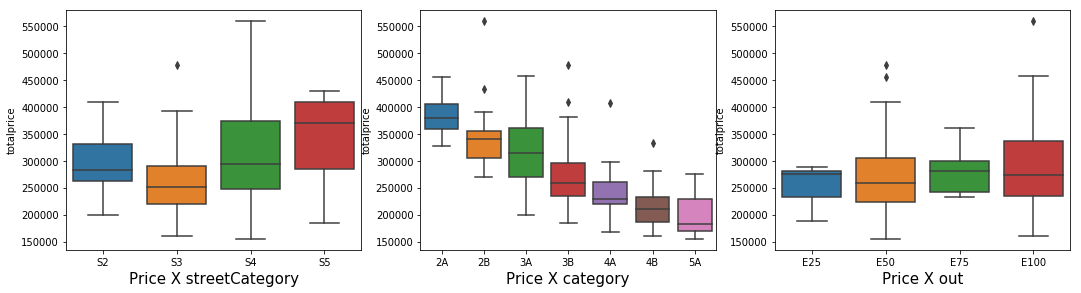

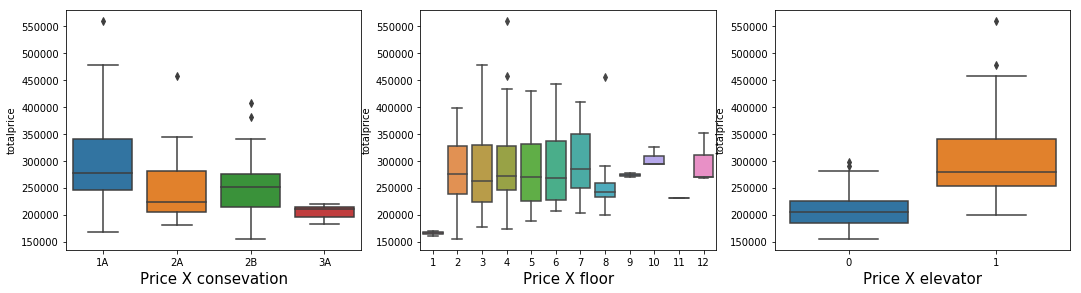

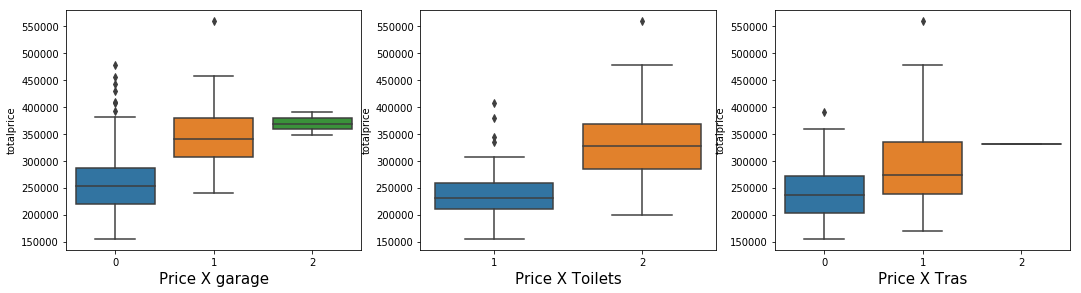

In [10]:
## Price Compared by Street Category, Category, and Out

f=plt.figure(figsize=(18,15))
# Distribution off Age
f.add_subplot(3,3,1)
c=sns.boxplot(y=data['totalprice'],x=data['streetcategory'], order=['S2','S3','S4','S5'])
c.set_xlabel("Price X streetCategory", fontsize=15)

f.add_subplot(3,3,2)
c=sns.boxplot(y=data['totalprice'],x=data['category'], order=['2A','2B','3A','3B','4A','4B','5A'])
c.set_xlabel("Price X category", fontsize=15)

f.add_subplot(3,3,3)
c=sns.boxplot(y=data['totalprice'],x=data['out'],order=['E25','E50','E75','E100'])
c.set_xlabel("Price X out", fontsize=15)

f=plt.figure(figsize=(18,15))
f.add_subplot(3,3,4)
c=sns.boxplot(y=data['totalprice'],x=data['conservation'], order=['1A','2A','2B','3A'])
c.set_xlabel("Price X consevation", fontsize=15)

f.add_subplot(3,3,5)
c=sns.boxplot(y=data['totalprice'],x=data['floor'])
c.set_xlabel("Price X floor", fontsize=15)

f.add_subplot(3,3,6)
c=sns.boxplot(y=data['totalprice'],x=data['elevator'])
c.set_xlabel("Price X elevator", fontsize=15)




f=plt.figure(figsize=(18,15))
f.add_subplot(3,3,7)
c=sns.boxplot(y=data['totalprice'],x=data['garage'])
c.set_xlabel("Price X garage", fontsize=15)

f.add_subplot(3,3,8)
c=sns.boxplot(y=data['totalprice'],x=data['toilets'])
c.set_xlabel("Price X Toilets", fontsize=15)

f.add_subplot(3,3,9)
c=sns.boxplot(y=data['totalprice'],x=data['tras'])
c.set_xlabel("Price X Tras", fontsize=15)


plt.show()

## Modelling - FeatureSelection 1

In [11]:
y=(data['totalprice'])
X=data.drop(['totalprice','out','zone'],1)

X=pd.get_dummies(X)
X.head()

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=1)

R2_train = []
R2_test = []
RMSE =[]
CV =[]

for i in all_model:
    model = i()
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    R2_train.append(model.score(X_train,y_train))
    R2_test.append(model.score(X_test,y_test))
    rmse=np.sqrt(mean_squared_error(y_test, y_pred))
    RMSE.append(rmse)
    CV.append(rmse/data['totalprice'].mean())
    
## compare model each other
Eval = pd.DataFrame()
Eval['model'] = desc_model
Eval['RMSE'] = RMSE
Eval['Coef_Variance']= CV
Eval['R-Square_Train'] = R2_train
Eval['R-Square_Test'] = R2_test
Eval['R-Square_Gap'] = abs(Eval['R-Square_Train'] -Eval['R-Square_Test'])
Eval
#Eval.sort_values(by='R-Square_Gap',ascending=True)

,model,RMSE,Coef_Variance,R-Square_Train,R-Square_Test,R-Square_Gap
0,LinearRegression,36019.895673,0.128303,0.689168,0.740794,0.051626
1,Ridge Regression,35700.143688,0.127164,0.688180,0.745375,0.057195
2,Lasso Regression,36018.318451,0.128297,0.689168,0.740816,0.051649


# 2. Variable Selection Using Correlation Matrix

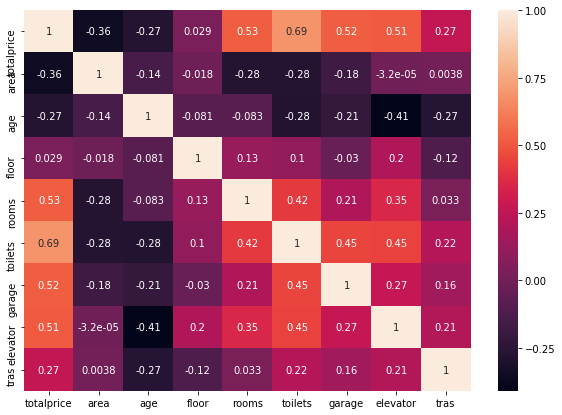

In [12]:
#Next step, we should choose numerical data first
plt.figure(figsize=(10,7))
sns.heatmap(numerik.corr(),annot=True)

## Modelling - FeatureSelection 2

In [13]:
y=(data['totalprice'])
X=data.drop(['totalprice','out','zone','floor'],1)

X=pd.get_dummies(X)
X.head()

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=1)

R2_train = []
R2_test = []
RMSE =[]
CV =[]

for i in all_model:
    model = i()
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    R2_train.append(model.score(X_train,y_train))
    R2_test.append(model.score(X_test,y_test))
    rmse=np.sqrt(mean_squared_error(y_test, y_pred))
    RMSE.append(rmse)
    CV.append(rmse/data['totalprice'].mean())
    
## compare model each other
Eval = pd.DataFrame()
Eval['model'] = desc_model
Eval['RMSE'] = RMSE
Eval['Coef_Variance']= CV
Eval['R-Square_Train'] = R2_train
Eval['R-Square_Test'] = R2_test
Eval['R-Square_Gap'] = abs(Eval['R-Square_Train'] -Eval['R-Square_Test'])
Eval
#Eval.sort_values(by='R-Square_Gap',ascending=True)

,model,RMSE,Coef_Variance,R-Square_Train,R-Square_Test,R-Square_Gap
0,LinearRegression,33099.200183,0.117899,0.670008,0.781125,0.111117
1,Ridge Regression,32835.786557,0.116961,0.669005,0.784595,0.115590
2,Lasso Regression,33098.259231,0.117896,0.670008,0.781138,0.111130


# 3. Variable Selection Using P-Value from Linear Regression

In [14]:
import patsy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats

In [15]:
y=(data['totalprice'])
X=data.drop(['totalprice','zone'],1)

X=pd.get_dummies(X)

X= sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

In [16]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             totalprice   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     19.68
Date:                Wed, 16 Oct 2019   Prob (F-statistic):           5.67e-41
Time:                        06:43:16   Log-Likelihood:                -2596.7
No. Observations:                 218   AIC:                             5247.
Df Residuals:                     191   BIC:                             5339.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              5.929e+04   1.43e+0

In [17]:
#model.pvalues

##  Modelling FeatureSelection 3

In [18]:
y=(data['totalprice'])
X=data.drop(['totalprice','out','zone','floor','age'],1)

X=pd.get_dummies(X)
X.head()

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=1)

R2_train = []
R2_test = []
RMSE =[]
CV =[]

for i in all_model:
    model = i()
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    R2_train.append(model.score(X_train,y_train))
    R2_test.append(model.score(X_test,y_test))
    rmse=np.sqrt(mean_squared_error(y_test, y_pred))
    RMSE.append(rmse)
    CV.append(rmse/data['totalprice'].mean())
    
## compare model each other
Eval = pd.DataFrame()
Eval['model'] = desc_model
Eval['RMSE'] = RMSE
Eval['Coef_Variance']= CV
Eval['R-Square_Train'] = R2_train
Eval['R-Square_Test'] = R2_test
Eval['R-Square_Gap'] = abs(Eval['R-Square_Train'] -Eval['R-Square_Test'])
Eval
#Eval.sort_values(by='R-Square_Gap',ascending=True)

,model,RMSE,Coef_Variance,R-Square_Train,R-Square_Test,R-Square_Gap
0,LinearRegression,32868.682183,0.117078,0.669027,0.784163,0.115136
1,Ridge Regression,32713.788623,0.116526,0.668247,0.786193,0.117946
2,Lasso Regression,32869.406157,0.117081,0.669027,0.784154,0.115127


# 4. Feature Selection Using Backwards Elimination

In [19]:
y=(data['totalprice'])
X=data.drop(['totalprice'],1)

X=pd.get_dummies(X)

#X= sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['area', 'rooms', 'toilets', 'garage', 'elevator', 'tras', 'zone_Z21', 'zone_Z31', 'zone_Z35', 'zone_Z37', 'zone_Z41', 'zone_Z42', 'zone_Z47', 'zone_Z52', 'category_2A', 'category_2B', 'category_3A', 'category_3B', 'category_4A', 'heating_4A']


# Modelling FeatureSelection 5

In [20]:
y=(data['totalprice'])
X=data.drop(['totalprice'],1)

X=pd.get_dummies(X)
#X=X[['area', 'rooms', 'toilets', 'garage', 'elevator', 'tras', 'zone_Z21', 'zone_Z31', 'zone_Z35', 'zone_Z37', 'zone_Z41', 'zone_Z42', 
#     'zone_Z47', 'zone_Z52', 'category_2A', 'category_2B', 'category_3A', 'category_3B', 'category_4A', 'heating_4A']]
X=X[selected_features_BE]
X.head()

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=1)

R2_train = []
R2_test = []
RMSE =[]
CV =[]

for i in all_model:
    model = i()
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    R2_train.append(model.score(X_train,y_train))
    R2_test.append(model.score(X_test,y_test))
    rmse=np.sqrt(mean_squared_error(y_test, y_pred))
    RMSE.append(rmse)
    CV.append(rmse/data['totalprice'].mean())
    
## compare model each other
Eval = pd.DataFrame()
Eval['model'] = desc_model
Eval['RMSE'] = RMSE
Eval['Coef_Variance']= CV
Eval['R-Square_Train'] = R2_train
Eval['R-Square_Test'] = R2_test
Eval['R-Square_Gap'] = abs(Eval['R-Square_Train'] -Eval['R-Square_Test'])
Eval

,model,RMSE,Coef_Variance,R-Square_Train,R-Square_Test,R-Square_Gap
0,LinearRegression,25606.732377,0.091211,0.841013,0.869001,0.027988
1,Ridge Regression,26330.470273,0.093789,0.832960,0.861491,0.028531
2,Lasso Regression,25607.021578,0.091212,0.841012,0.868998,0.027985


# Modelling

### Define target Variable (X) and the Features(y)

In [21]:
y=(data['totalprice'])
X=data.drop(['totalprice'],1)



### Dummy Variable for Categorical Variable

In [22]:
X=pd.get_dummies(X)
X=X[selected_features_BE]
X.head()

,area,rooms,toilets,garage,elevator,tras,zone_Z21,zone_Z31,zone_Z35,zone_Z37,zone_Z41,zone_Z42,zone_Z47,zone_Z52,category_2A,category_2B,category_3A,category_3B,category_4A,heating_4A
0,7.531000e+09,5,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.006500e+09,5,2,1,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1
2,8.887000e+09,5,2,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,6.261000e+09,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1.461500e+09,7,2,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1


### Split Data Training and Testing

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=1)

### Collect All Possible model 
Model yang dibandingkan untuk memprediksi harga rumah adalah
1. Decision Tree Regresor
2. LinearRegression
3. Ridge
4. Lasso
5. KNeighborsRegressor
6. SVR
7. RandomForestRegressor
8. GradientBoostingRegressor

In [24]:
## collect all model in one list
all_model = [DecisionTreeRegressor,
            LinearRegression,
             Ridge,
             Lasso,
             KNeighborsRegressor,
             SVR,
            RandomForestRegressor,
            GradientBoostingRegressor]

desc_model = ['DecisionTreeRegressor',
            'LinearRegression',
             'Ridge Regression',
             'Lasso Regression',
             'KNeighborsRegressor',
             'SVR',
            'RandomForestRegressor',
            'GradientBoostingRegressor']

all_model

[sklearn.tree.tree.DecisionTreeRegressor,
 sklearn.linear_model.base.LinearRegression,
 sklearn.linear_model.ridge.Ridge,
 sklearn.linear_model.coordinate_descent.Lasso,
 sklearn.neighbors.regression.KNeighborsRegressor,
 sklearn.svm.classes.SVR,
 sklearn.ensemble.forest.RandomForestRegressor,
 sklearn.ensemble.gradient_boosting.GradientBoostingRegressor]

### Modelling

In [25]:
R2_train = []
R2_test = []
RMSE =[]
CV =[]

for i in all_model:
    model = i()
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    R2_train.append(model.score(X_train,y_train))
    R2_test.append(model.score(X_test,y_test))
    rmse=np.sqrt(mean_squared_error(y_test, y_pred))
    RMSE.append(rmse)
    CV.append(rmse/data['totalprice'].mean())

### Evaluation (Accuration or Error)

1. Model Evaluation that would be used to evaluate the model are RMSE,R-sqare, R-square_gap and Coef_Variance
2. Semakin kecil RMSE dan Coef_Variance nya, akan semakin bagus modelnya.
3. Semakin tinggi dan mendekati 1 nilai R-square nya, maka makan model akan semakin bagus.
4. Semakin kecil gap antara R-square train dan test, maka model tersebut semakin tidak overfit

In [26]:
## compare model each other
Eval = pd.DataFrame()
Eval['model'] = desc_model
Eval['RMSE'] = RMSE
Eval['Coef_Variance']= CV
Eval['R-Square_Train'] = R2_train
Eval['R-Square_Test'] = R2_test
Eval['R-Square_Gap'] = abs(Eval['R-Square_Train'] -Eval['R-Square_Test'])
Eval.sort_values(by='R-Square_Gap',ascending=True)

,model,RMSE,Coef_Variance,R-Square_Train,R-Square_Test,R-Square_Gap
3,Lasso Regression,25607.021578,0.091212,0.841012,0.868998,0.027985
1,LinearRegression,25606.732377,0.091211,0.841013,0.869001,0.027988
2,Ridge Regression,26330.470273,0.093789,0.832960,0.861491,0.028531
5,SVR,70822.420834,0.252269,-0.042170,-0.002080,0.040090
7,GradientBoostingRegressor,23068.024019,0.082168,0.952401,0.893688,0.058713
4,KNeighborsRegressor,33454.121090,0.119163,0.690424,0.776406,0.085982
6,RandomForestRegressor,30157.271908,0.107420,0.918347,0.818304,0.100042
0,DecisionTreeRegressor,36082.297476,0.128525,0.999405,0.739895,0.259510


Dari hasil perbandingan model, terlihat bahwa model dengan Rsquare_train tertinggi adalah Gradient boosting, Random Forest dan Decision tree, namun nilai Rsquare-train nya sangat berbeda jauh gap nya dengan R-square test, sehingga dapat dikatakan model itu overfit dan tidak baik untuk pemodelan.

Model dengan RMSE terendah dan R-square gap terkecil adalah Model Ridge Regression dengan R-square sebesar 85.7%. Model ini yang akan digunakan untuk memprediksi harga rumah.

## Ridge Regression Modelling with Tuning Parameter (alpha =0.4)

In [27]:
model1=Ridge(alpha=0.4)
model1.fit(X_train,y_train)

Ridge(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [28]:
from sklearn.metrics import mean_squared_error, r2_score
y_predicted = model1.predict(X_test)
# model evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_predicted))
r2 = r2_score(y_test, y_predicted)
cv= rmse/data['totalprice'].mean()
print(model1.score(X_test, y_test))
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)
print('Coef Variance',cv)

0.8675256793933035
Root mean squared error:  25750.486019182936
R2 score:  0.8675256793933035
Coef Variance 0.09172311122969781


# Thank You
Created by : Fransdana Nadeak